In [6]:
import pandas as pd

In [7]:
df = pd.read_csv("datasets/me-temperatures.csv")

<Axes: xlabel='timestamp'>

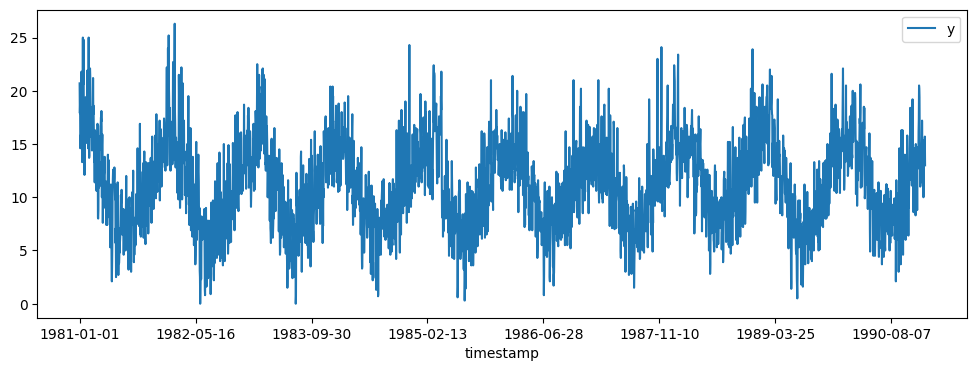

In [8]:
df.plot("timestamp", "y", figsize=(12, 4))

<br><br><br><br><br><br><br><br><br><br><br><br>

In [9]:
from skrub import SelectCols
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import OneHotEncoder, SplineTransformer, FunctionTransformer
from sklearn.linear_model import LinearRegression

In [12]:
def add_timefeats(dataf):
    return (dataf
            .assign(timestamp=lambda d: pd.to_datetime(d['timestamp']), 
                    month=lambda d: d['timestamp'].dt.month,
                    day_of_year=lambda d: d['timestamp'].dt.dayofyear))

df = pd.read_csv("datasets/me-temperatures.csv").pipe(add_timefeats)
X, y = df[['month', 'day_of_year']], df['y'].values

In [14]:
pipe = make_pipeline(SelectCols(["month"]), OneHotEncoder(), LinearRegression())
pipe

Pipeline(steps=[('selectcols', SelectCols(cols=['month'])),
                ('onehotencoder', OneHotEncoder()),
                ('linearregression', LinearRegression())])

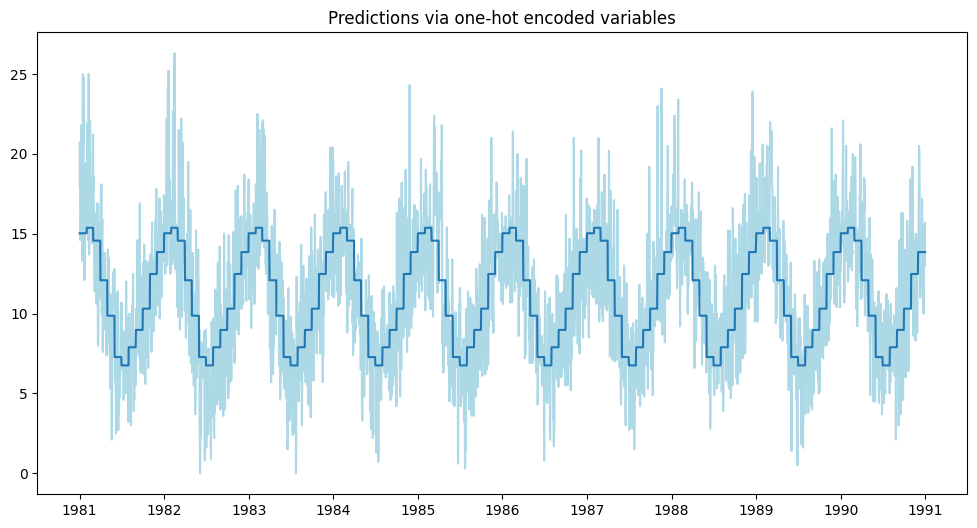

In [15]:
import matplotlib.pylab as plt 

plt.figure(figsize=(12, 6))
plt.plot(df["timestamp"], df["y"], color="lightblue")
pred = pipe.fit(X, y).predict(X)
plt.plot(df["timestamp"], pred)
plt.title("Predictions via one-hot encoded variables");

Enter the `SplineTransformer`. 

In [18]:
import numpy as np 

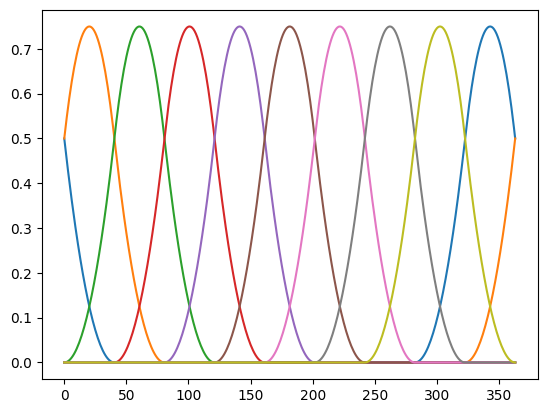

In [38]:
tfm = SplineTransformer(extrapolation="periodic", n_knots=10, knots="quantile", degree=2)
x_space = np.arange(1, 365).reshape(-1, 1)
plt.plot(tfm.fit(x_space).transform(x_space));

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>

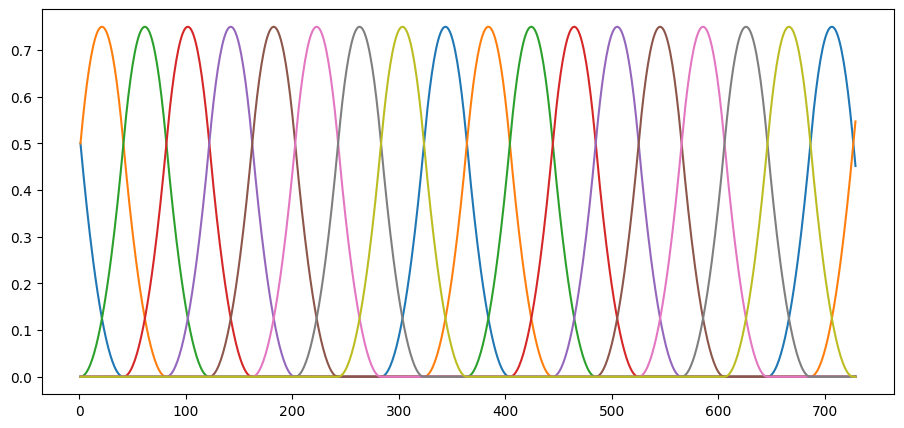

In [39]:
x_more_space = np.arange(1, 365 * 2).reshape(-1, 1)
plt.figure(figsize=(11, 5))
plt.plot(x_more_space, tfm.transform(x_more_space));

In [45]:
pipe = make_pipeline(
    SelectCols(["day_of_year"]), 
    SplineTransformer(extrapolation="periodic", knots="uniform", n_knots=20, degree=2), 
    LinearRegression()
)
pipe

Pipeline(steps=[('selectcols', SelectCols(cols=['day_of_year'])),
                ('splinetransformer',
                 SplineTransformer(degree=2, extrapolation='periodic',
                                   n_knots=20)),
                ('linearregression', LinearRegression())])

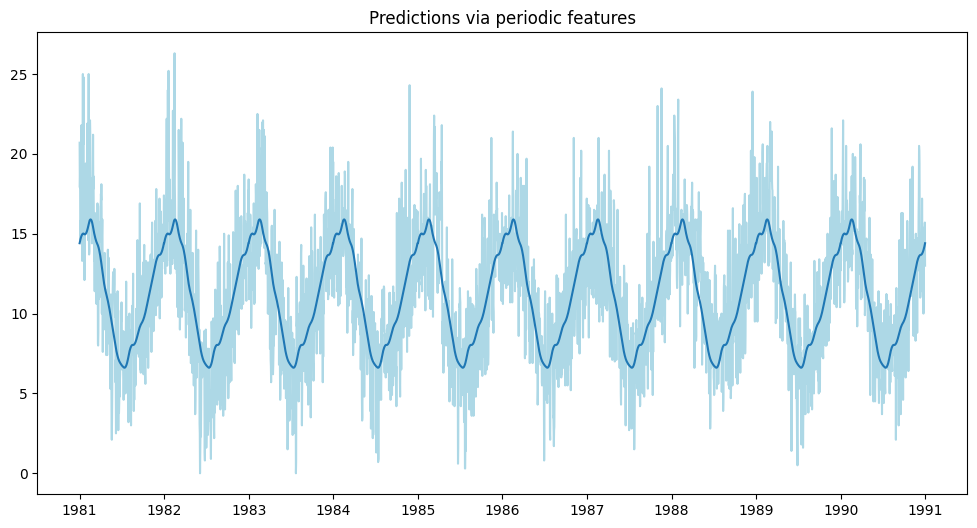

In [46]:
plt.figure(figsize=(12, 6))
plt.plot(df["timestamp"], df["y"], color="lightblue")
pred = pipe.fit(X, y).predict(X)
plt.plot(df["timestamp"], pred)
plt.title("Predictions via periodic features");